In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [2]:
es_data = pd.read_csv("DepEd_ES.csv")
ss_data = pd.read_csv("DepEd_SS.csv")

In [5]:
es_data.head()

,SchID,SchName,DivName,DivisionCode,Province,MunicipalityORCity,Clusters,Region,Filipino,AralinP,Mathematics,Science,English,Overall,Internet,Lat,Long,Enrolled,Teachers,Ratio,Energized,Grid,SchoolType,PBOR,PovertyCluster,PovertyIncidence,LowerLimit,UpperLimit
0,134968,Bangued East CS,Abra,N01,ABRA,BANGUED (Capital),4,CAR,44.0141,37.4648,52.2887,36.1268,41.7606,42.3310,0,17.5988,120.616,443,19,23,1,1,School with no Annexes,15781.0,3,20,16,53
1,135008,Siwasiw ES,Abra,N01,ABRA,BUCAY,5,CAR,64.4022,64.7283,63.2609,69.8370,65.0543,65.4565,1,17.5412,120.742,225,6,37,1,1,School with no Annexes,15781.0,3,20,16,53
2,134995,Layugan ES,Abra,N01,ABRA,BUCAY,5,CAR,67.8049,75.9756,68.7805,81.3415,86.2195,76.0244,0,17.5028,120.706,295,9,32,1,1,School with no Annexes,15781.0,3,20,16,53
3,135182,Ducligan ES,Abra,N01,ABRA,BUCLOC,6,CAR,72.8846,73.8462,69.8077,58.8462,76.3462,70.3462,0,17.4386,120.803,248,12,20,1,1,School with no Annexes,15781.0,3,20,16,53
4,135022,Pacac ES,Abra,N01,ABRA,DOLORES,6,CAR,72.7083,80.4167,83.3333,78.7500,78.5417,78.7500,1,17.6633,120.718,76,4,19,1,1,School with no Annexes,15781.0,3,20,16,53


# Effect of Being Energized

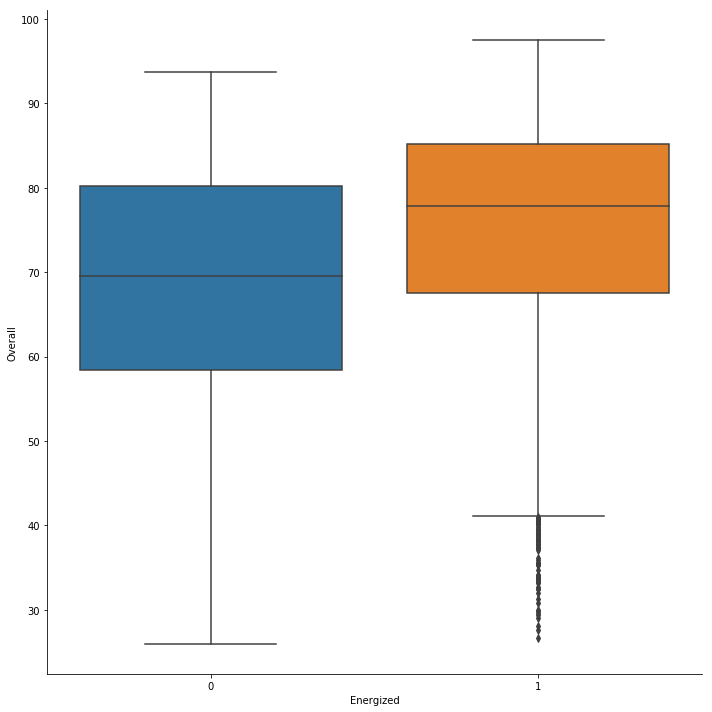

In [49]:
sns.catplot(data=es_data,
            x='Energized',
            y='Overall',
            kind='box',
            height=10)

In [12]:
pd.pivot(data=es_data,
         index='SchID',
         columns='Energized',
         values='Overall').describe()

Energized,0,1
count,301.000000,3076.000000
mean,68.067056,74.858395
std,15.153649,13.742581
min,26.000000,26.635100
25%,58.437500,67.557025
50%,69.526600,77.870200
75%,80.229700,85.219075
max,93.736800,97.500000


In [13]:
(78 - 69.5)/69.5

0.1223021582733813

### Insights:
- Around 10% of the elementary schools in the data don't have electricity.
- On average, those who do have electricity perform 12% better in their overall NAT scores than those without.

### per Subject Analysis

In [14]:
es_data.columns

Index(['SchID', 'SchName', 'DivName', 'DivisionCode', 'Province',
       'MunicipalityORCity', 'Clusters', 'Region', 'Filipino', 'AralinP',
       'Mathematics', 'Science', 'English', 'Overall', 'Internet', 'Lat',
       'Long', 'Enrolled', 'Teachers', 'Ratio', 'Energized', 'Grid',
       'SchoolType', 'PBOR', 'PovertyCluster', 'PovertyIncidence',
       'LowerLimit', 'UpperLimit'],
      dtype='object')

Score Difference for Filipino


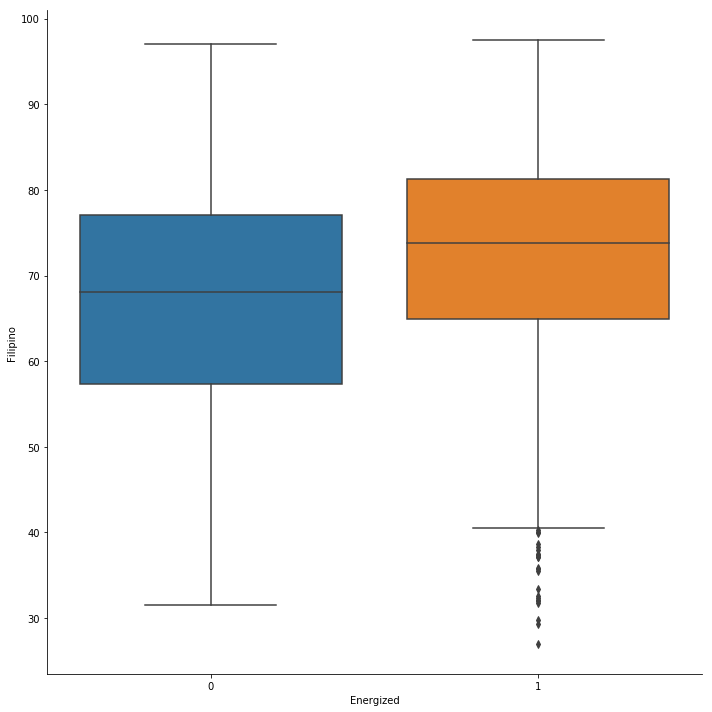

Score Difference for AralinP


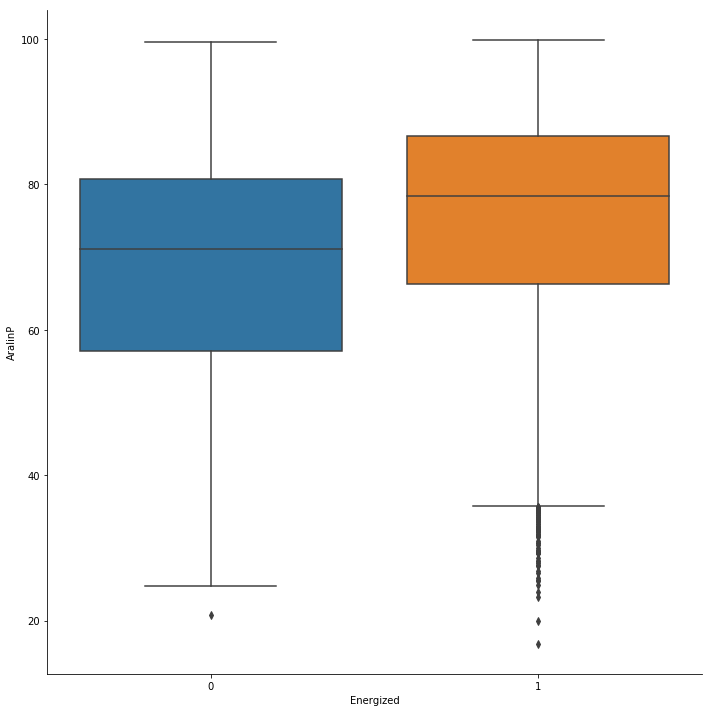

Score Difference for Mathematics


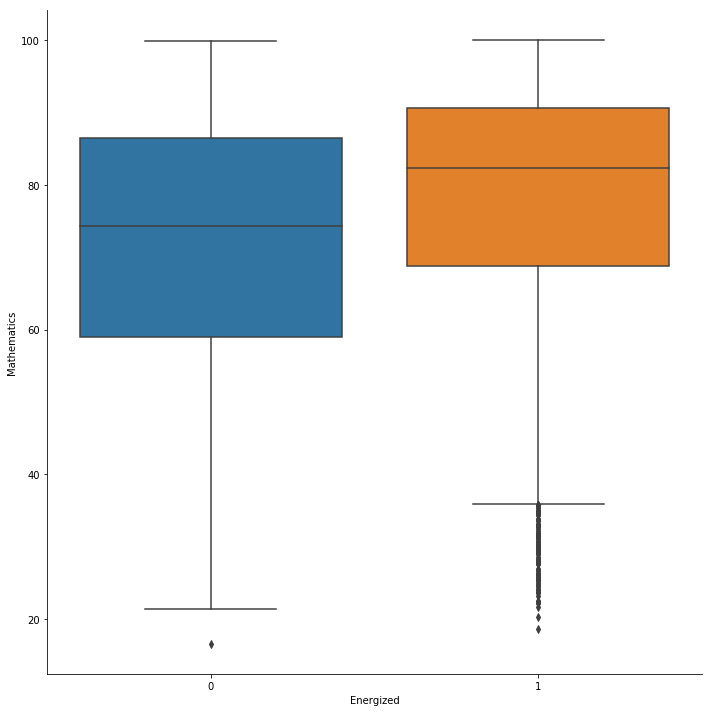

Score Difference for Science


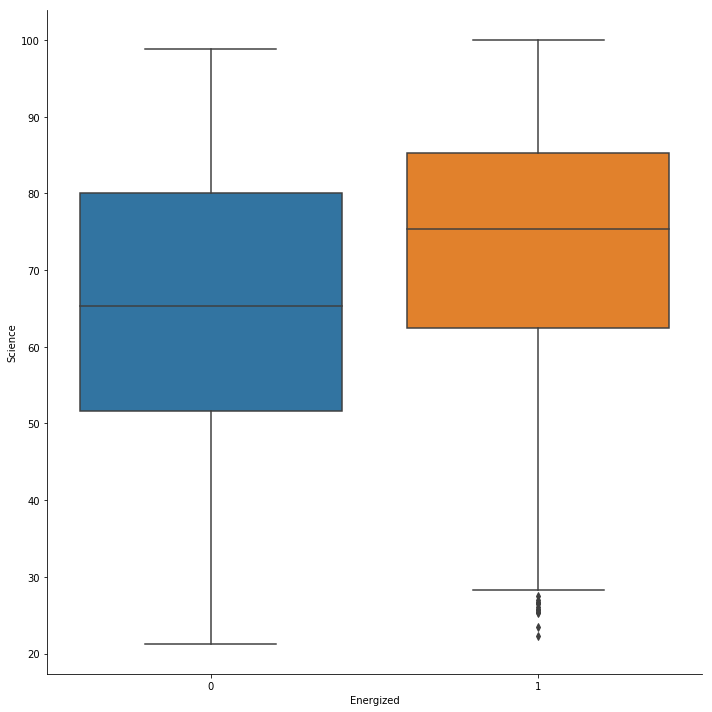

Score Difference for English


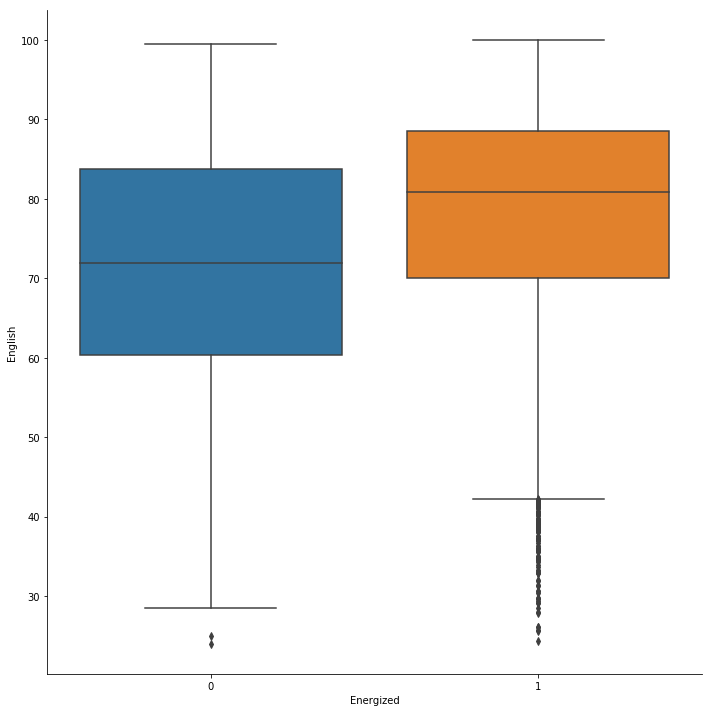

In [20]:
subjects = ['Filipino', 'AralinP', 'Mathematics', 'Science', 'English']
for subject in subjects:
    print (f'Score Difference for {subject}')
    sns.catplot(data=es_data,
                x='Energized',
                y=subject,
                kind='box',
                height=10)
    plt.show()
    

It is clear that for individual subjects, energized schools perform better.

In [24]:
pd.pivot(data=es_data,
         index='SchID',
         columns='Energized',
         values=subject).describe().loc['50%']

Energized
0    71.9444
1    80.9259
Name: 50%, dtype: float64

In [34]:
percent_increases = []
for subject in subjects:
    print (f'Median scores for {subject}')
    medians = pd.pivot(data=es_data,
         index='SchID',
         columns='Energized',
         values=subject).describe().loc['50%']
    
    print(medians)
    
    # normalize
    percent_increase = (medians[1] - medians[0]) * 100./medians[0]
    percent_increases.append(percent_increase)
    print(percent_increase)
    
    

Median scores for Filipino
Energized
0    68.125
1    73.750
Name: 50%, dtype: float64
8.256880733944953
Median scores for AralinP
Energized
0    71.07140
1    78.36585
Name: 50%, dtype: float64
10.263551864744464
Median scores for Mathematics
Energized
0    74.3293
1    82.2638
Name: 50%, dtype: float64
10.674794461941657
Median scores for Science
Energized
0    65.2778
1    75.3033
Name: 50%, dtype: float64
15.35820753763149
Median scores for English
Energized
0    71.9444
1    80.9259
Name: 50%, dtype: float64
12.483945936028372


Text(0,0.5,'Percent Improvement if School is Energized')

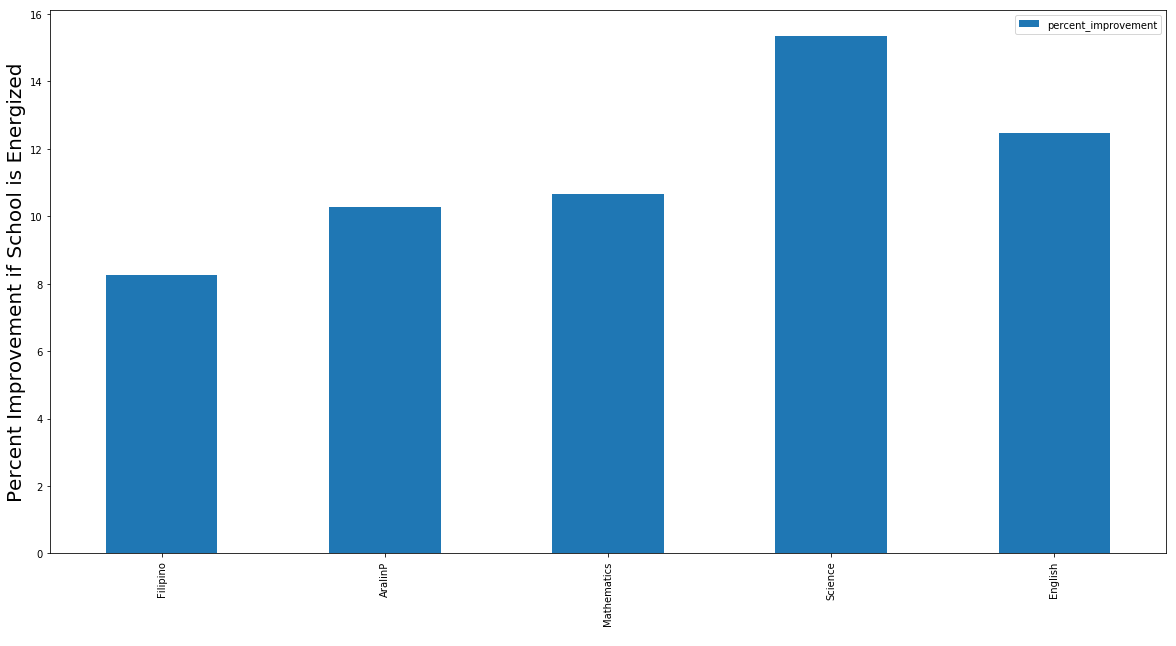

In [46]:
perc_inc_df = pd.DataFrame(np.array([subjects, percent_increases]).T, columns=['subject', 
                                                                 'percent_improvement'])

perc_inc_df['percent_improvement'] = perc_inc_df['percent_improvement'].astype(float)
perc_inc_df.set_index('subject').plot(kind='bar', figsize=(20, 10))
plt.xlabel(' ')
plt.ylabel('Percent Improvement if School is Energized', fontsize=20)

- We see that the sciences have a larger median improvement if school is energized. We can attribute this to the fact that being energized means more lab experiments can be performed by students, thereby increasing their learning. Chances are, energized schools also have internet connectivity which may contribute to this improvement. 

# Effect of Internet Connectivity

In [47]:
es_data.columns

Index(['SchID', 'SchName', 'DivName', 'DivisionCode', 'Province',
       'MunicipalityORCity', 'Clusters', 'Region', 'Filipino', 'AralinP',
       'Mathematics', 'Science', 'English', 'Overall', 'Internet', 'Lat',
       'Long', 'Enrolled', 'Teachers', 'Ratio', 'Energized', 'Grid',
       'SchoolType', 'PBOR', 'PovertyCluster', 'PovertyIncidence',
       'LowerLimit', 'UpperLimit'],
      dtype='object')

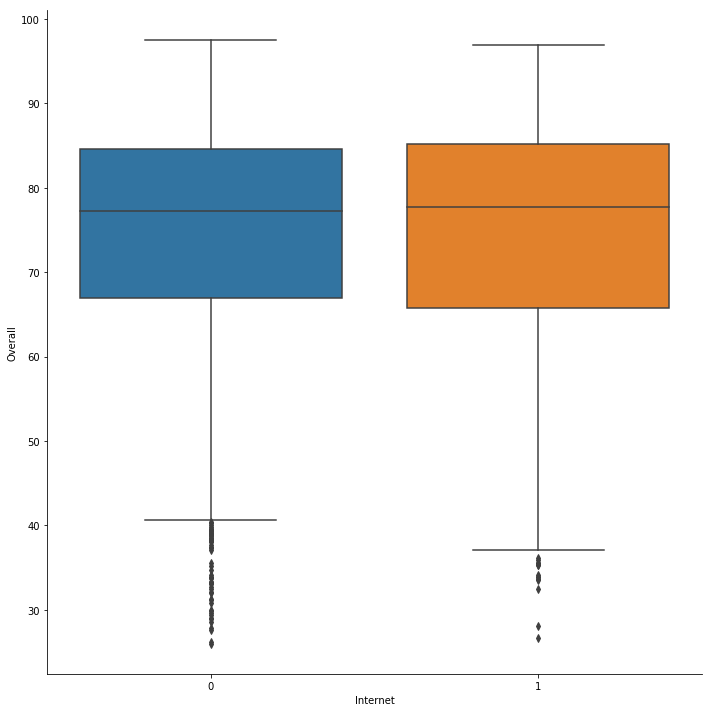

In [48]:
sns.catplot(data=es_data,
            x='Internet',
            y='Overall',
            kind='box',
            height=10)

### Per Subject Analysis

Score Difference for Filipino


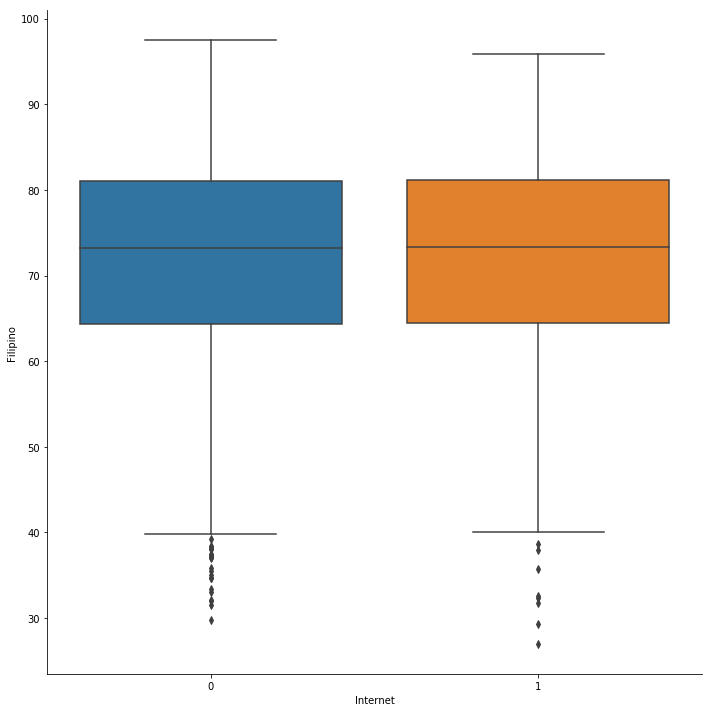

Score Difference for AralinP


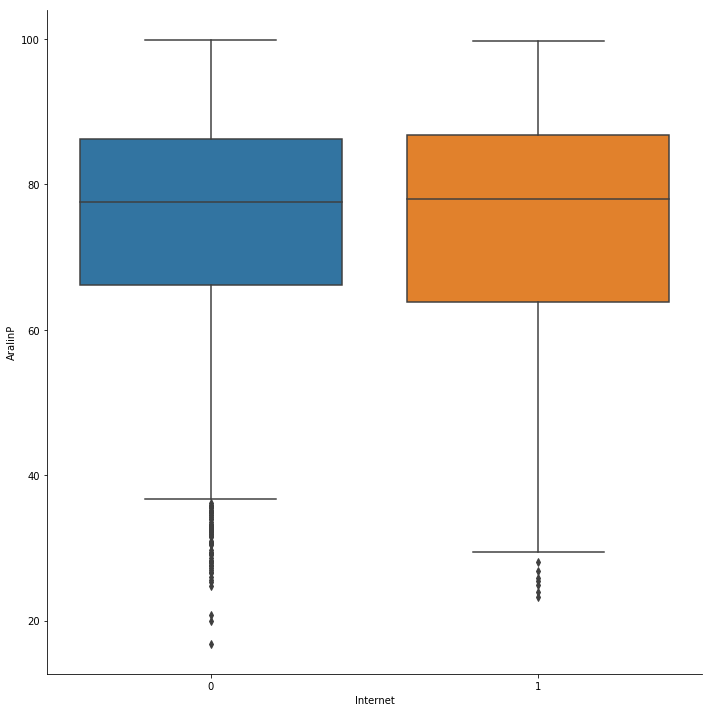

Score Difference for Mathematics


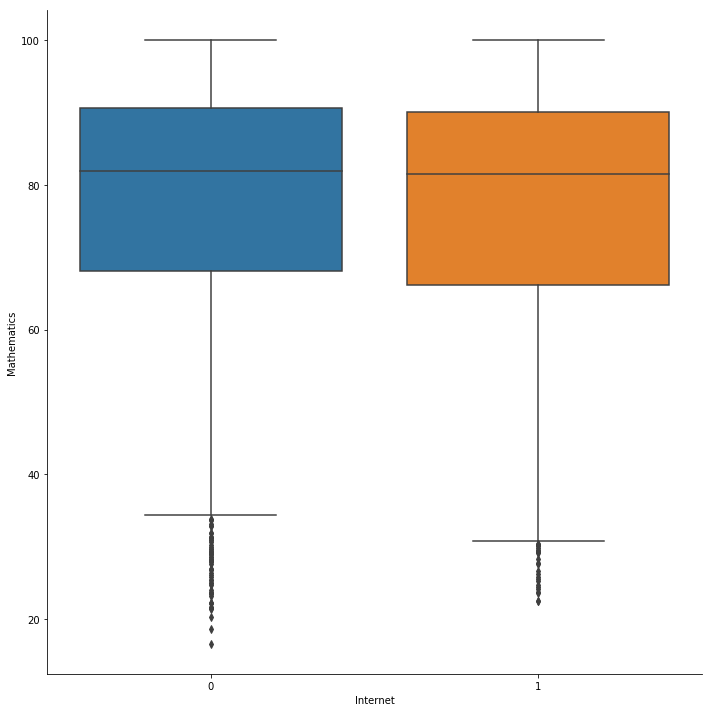

Score Difference for Science


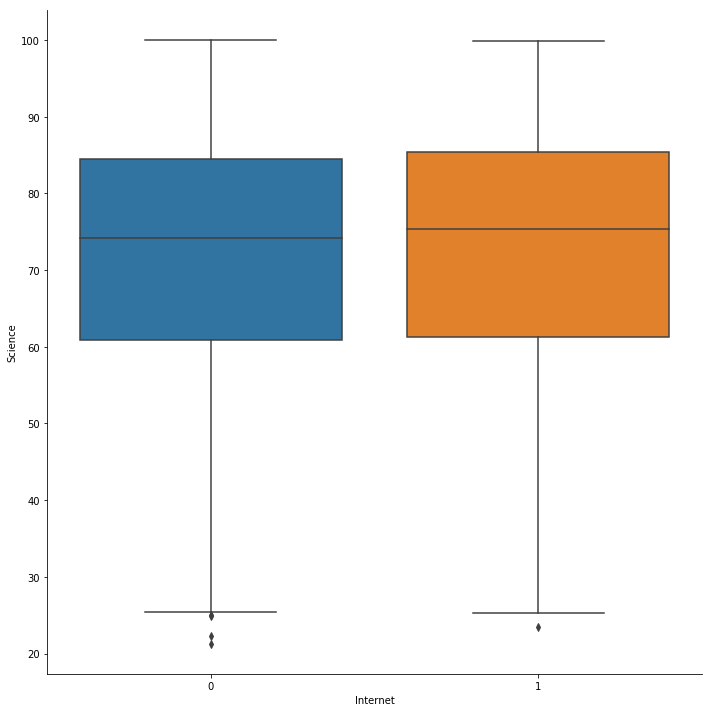

Score Difference for English


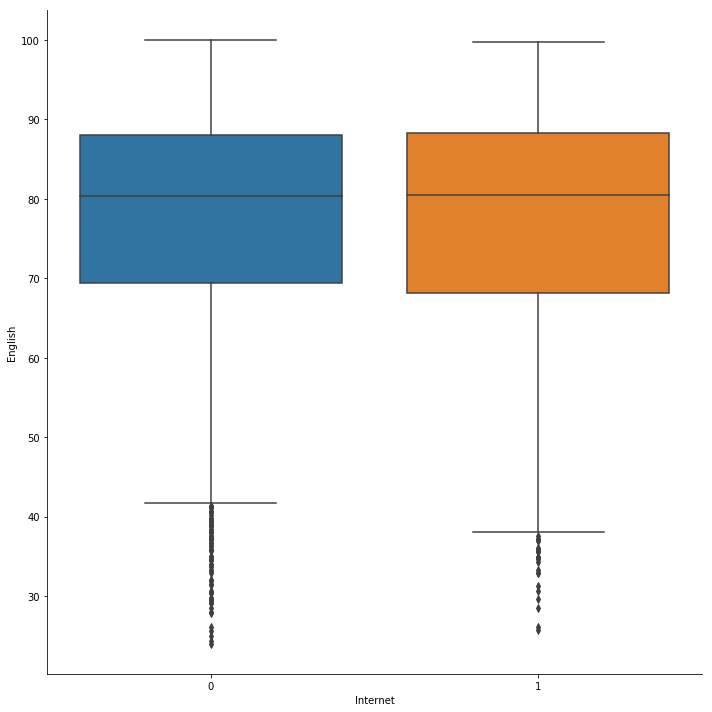

In [50]:
subjects = ['Filipino', 'AralinP', 'Mathematics', 'Science', 'English']
for subject in subjects:
    print (f'Score Difference for {subject}')
    sns.catplot(data=es_data,
                x='Internet',
                y=subject,
                kind='box',
                height=10)
    plt.show()
    

In [51]:
percent_increases = []
for subject in subjects:
    print (f'Median scores for {subject}')
    medians = pd.pivot(data=es_data,
         index='SchID',
         columns='Internet',
         values=subject).describe().loc['50%']
    
    print(medians)
    
    # normalize
    percent_increase = (medians[1] - medians[0]) * 100./medians[0]
    percent_increases.append(percent_increase)
    print(percent_increase)
    
    

Median scores for Filipino
Internet
0    73.2500
1    73.3333
Name: 50%, dtype: float64
0.11372013651876335
Median scores for AralinP
Internet
0    77.50000
1    78.04725
Name: 50%, dtype: float64
0.7061290322580714
Median scores for Mathematics
Internet
0    81.84780
1    81.44325
Name: 50%, dtype: float64
-0.49427107387125907
Median scores for Science
Internet
0    74.18270
1    75.38145
Name: 50%, dtype: float64
1.6159428006799483
Median scores for English
Internet
0    80.3846
1    80.4321
Name: 50%, dtype: float64
0.059090920400157766


I don't see the same improvement comparing schools with and schools without internet connectivity.